# NX31 Model Project

# Introduction

In this Model project we will examine the Overlapping Generations Model (OLG). First we will look at the General OLG model with  consumption and savings in two periods. Second we will expand with an extensions of the model, as we look at the Pay As You Go (PAYG) OLG model. The PAYG OLG model includes a tax, which the young generation pay from their wages. This tax is then transfered to the elderly generation for them to consume. 
We will look an an OLG model with two generations, a generation which is working and a generation living on pension. They have a life-time utility function. In both models there are no savings in period two, as you consume everything as old.

The PAYG OLG model is like a state funded pension, where the young generation pays to the current old generation. When the young generation retires, a new young generation will pay a tax and thus fund their pension.

Our analysis of the model will consist of how the share of capital $\alpha$, the discount factor on consumption $\rho$, and the population growth $n$ effect in the two models differently.

## Packages and extensions 

In [1]:
# These two lines above makes sure that the functions and packages are automatically reloaded each time we run a cell.
%load_ext autoreload
%autoreload 2

In [2]:
#Loading packages
import numpy as np
import scipy as sp
from scipy import linalg
from scipy import optimize
from scipy import interpolate
import sympy as sm
from IPython.display import display

%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Enables sympy to write functions as math
sm.init_printing(use_unicode=True)

# The General OLG model:

As mentioned, we start with the General OLG model with savings and consumption. This model looks as shown below.

Population growth:

\begin{eqnarray*}
L_t=(1+n) L_{t-1}
\end{eqnarray*}

Life-time utility:

\begin{eqnarray*}
U_t=ln⁡(c_{1,t} )+ \frac{1}{(1+\rho)}ln⁡(c_{2,t+1} )
\end{eqnarray*}

Model contraints:

\begin{eqnarray*}
ρ>-1
\end{eqnarray*}
\begin{eqnarray*}
c_{1,t}=w_t-s_t
\end{eqnarray*}
\begin{eqnarray*}
c_{2,t+1}=(1+r_{t+1} ) s_t
\end{eqnarray*}

where

- $L_t$ is population
- $n$ is growth rate of population
- $U_t$ is life-time utility
- $c_1,_t$ is consumption as young
- $c_2,_t$ is consumption as old
- $\rho$ is the discount rate on consumption
- $w_t$ is wage
- $s_t$ is savings
- $r_t$ is the interest rate

## The firm problem

We start by optimizing the firm problem, this  will be the same in all extensions of our OLG models.

The output function is given by:

\begin{eqnarray*}
F(K_t,L_t)=Y_t=A(K_t)^\alpha(L_t)^{1-\alpha}
\end{eqnarray*}

The profit function is given by:

\begin{eqnarray*}
\Pi(K_t,L_t)=F(K_t,L_t)-w_tL_t-(r_t+\delta)K_t
\end{eqnarray*}




- $Y_t$ is output
- $A_t$ is total factor productivity (TFP)
- $K_t$ is capital
- $L_t$ is population / labor force
- $\alpha$ is the share of capital
- $\Pi$ is profit
- $w_t$ is wage
- $r_t$ is the real interest rate
- $\delta$ is the degree of depreciation


We will use the profit function and output function, to calculate our marginal products, $r$ and $w$. To do this, we will  use the sympy package, which has math solving tools. We start off by defining variables as symbols.

All symbols used for this model project is defined below.

In [3]:
# Defines variables for sympy math symbols
K_t = sm.symbols('K_t')
L_t = sm.symbols('L_t')
A = sm.symbols('A')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
rho = sm.symbols('rho')
w_t = sm.symbols('w_t')
r_t = sm.symbols('r_t')
n = sm.symbols('n')
k_t = sm.symbols('k_t')
Pi = sm.symbols('Pi_t')

s_t = sm.symbols('s_t')
U_t = sm.symbols('U_t')
U = sm.symbols('U_t')
r_plus = sm.symbols('r_t+1')
k = sm.symbols('k^*')

d = sm.symbols('d')
s_payg = sm.symbols('s_payg')
w_plus = sm.symbols('w_t+1')
k_payg = sm.symbols('k_payg')
U_payg = sm.symbols('U_paygt')
kpaygss = sm.symbols('k_payg^*')

Now that the symbols are defined, we now setup the functions and solve using the sympy package.

The Profit of the Firm


The First Order Conditions:


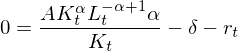

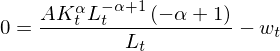

The marginal products:


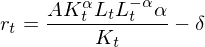

In [4]:
# Solves the firm problem and finds r and w
print(f'The Profit of the Firm')
PI = A*(K_t**alpha)*(L_t**(1-alpha))-w_t*L_t-(r_t+delta)*K_t
display(sm.Eq(Pi,PI))
print(f'The First Order Conditions:')
f1 = sm.diff(PI,K_t)
f2 = sm.diff(PI,L_t)
display(sm.Eq(0,f1))
display(sm.Eq(0,f2))
print(f'The marginal products:')
f1solve = sm.solve(f1, r_t)[0]
f2solve = sm.solve(f2, w_t)[0]
display(sm.Eq(r_t,f1solve))
display(sm.Eq(w_t,f2solve))

Now that we have the marginal products of capital and labor. We are interested in having the results given by capital pr. capita, $k$. We do this using:

\begin{eqnarray*}
k_t = \frac{K_t}{L_t} , k_{t+1} = \frac{K_{t+1}}{L_{t+1}}
\end{eqnarray*}

The marginal products of capital, $r_t$, and labor, $w_t$, can be written as.

\begin{eqnarray*}
r_t = \alpha Ak_t^{\alpha-1}-\delta
\end{eqnarray*}

\begin{eqnarray*}
w_t = (1-\alpha) Ak_t^{\alpha}
\end{eqnarray*}

## The household problem

Next we will have to solve the household problem, by finding an expression for savings, $s_t$. Below we once again use the sympy package to solve the household problem and thus finds the savings rate.

The Life-time Utility


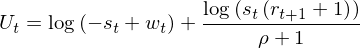

The First Orden Condition:


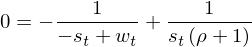

The Savings rate:


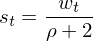

In [5]:
# Solve the household problem and find s
U_t = sm.log(w_t-s_t)+(1/(1+rho))*sm.log((1+r_plus)*s_t)
print(f'The Life-time Utility')
display(sm.Eq(U,U_t))
U_d = sm.diff(U_t,s_t)
print(f'The First Orden Condition:')
display(sm.Eq(0,U_d))
usolve = sm.solve(U_d,s_t)[0]
print(f'The Savings rate:')
display(sm.Eq(s_t,usolve))

## Finding steady state

### Steady state function

In order to reach a steady state for capital, $k$, we have to setup the transitions curve for capital. Below we use the model and the results we have found, to reach an expression for steady state value $k^*$.

The aggregated solution in the OLG model is defined as:
\begin{eqnarray*}
K_{t+1}=K_t (1-δ)+S_{1,t}+S_{2,t+1},  S_{2,t+1}≡-(1-δ) K_t=0	
\end{eqnarray*}
Because there are no savings in second period, and we have assumed full depreciation ($\delta = 1$) we get:
\begin{eqnarray*}
K_{t+1}=S_{1,t}=s_t L_t
\end{eqnarray*}
Now we set up the transition curve:
\begin{eqnarray*}
\frac{K_{t+1}}{L_{t+1}} =k_{t+1}=s_t  \frac{L_t}{L_{t+1}} =s_t  \frac{L_t}{(L_t (1+n) )}=\frac{s_t}{(1+n)}=\frac{w_t}{(2+ρ)}  \frac{1}{(1+n)}=\frac{(1-α)Ak_t^α}{(2+ρ)(1+n)} 
\end{eqnarray*}
In steady state we know that there are no change i capital so that:
\begin{eqnarray*}
k_{t+1} = k_t = k^*
\end{eqnarray*}

Next up we solve it using sympy, and find en expression for steady state $k^*$.

The steady state in the General OLG model is:


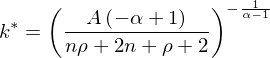

In [6]:
# Solves transition curve to find SS k
ss = sm.Eq(k_t,(((1-alpha)*A*(k_t**alpha))/((2+rho)*(1+n))))
kss = sm.solve(ss,k_t)[0]
print(f'The steady state in the General OLG model is:')
display(sm.Eq(k,kss))

### Analytical solution

We will now use the function for the steady state $k^*$ in a lambdify function to find the value of the steady state $k^*$ using the analytical method. 

In [7]:
#Creates SS function for k
ss_func = sm.lambdify((alpha,n,rho,A),kss)

In [8]:
# Solves SS for k, given input
ss_func(1/3,0.02,0.04,1)

In [9]:
print(f'The steady state value of capital in the General OLG model is :')
display(sm.Eq(k,0.1814))

The steady state value of capital in the General OLG model is :


### Numerical solution

We define the numerical parameter for usage in the numerical solution as well as the visualization later on.

The share of capital, $\alpha$, is generally agreed to be one third, also described by Sørensen and Whitta-Jacobsen.
The growth rate of population, $n$, is set as default to two percent as Romer also would do.
The discount rate on consumption, $\rho$, is set to $0.04$, as default, which means that consumption as young generate more utility than consumption as old.
TFP/A has been normalized to one.

In [10]:
# Defines global values for parameters
alpha_v = 1/3
n_v = 0.02
rho_v = 0.04
A_v = 1

To solve the numerical solution we use the function for the steady state $k^*$ from section 3.3.1 and the root_scalar optimizer.

In [11]:
obj_kss = lambda kss: kss - ((1-alpha_v)*A_v*(kss**alpha_v))/((2+rho_v)*(1+n_v))
result = optimize.root_scalar(obj_kss,bracket=[0.1,100],method='brentq')
result

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 0.18135001783804428

To make sure that the analytical and numerical solution have found the same result we assert this in the cell below.

In [12]:
print(f'Analytical solution is: {ss_func(alpha_v,n_v,rho_v,A_v):.4f}')
print(f'Numerical solution is: {result.root:.4f}')

assert abs(ss_func(alpha_v,n_v,rho_v,A_v) - result.root) < 10**(-2)

Analytical solution is: 0.1814
Numerical solution is: 0.1814


## Visualization

To compare the General OLG model, with the PAYG OLG model, we will make visualizations of the models. First we will look at the General OLG model, therefore the figures below are all for the General OLG model, but with the option to change the share of capital $\alpha$, the discount factor on consumption $\rho$ and the population growth $n$.

### Interactive Figures
Below we define the function for the the transition curve. After that is done, we create the plots with interactive sliders, where you can see the changes in the transistion towards steady state

In [13]:
# Defining transistion curve general model
def trans_func(k_t, alpha, A, rho, n):
    return ((1-alpha)*A*k_t**alpha)/((2+rho)*(1+n))

In [14]:
# Define k_t
k_t = np.linspace(0,1,1000) #(min, max, steps)

In [15]:
#Defining the plots
def plot_alpha(alpha):
    print(f"The analytic solution is {ss_func(alpha, n_v,rho_v,A_v):.4f}")
    plt.figure(dpi=100)
    plt.xlabel('k_t')
    plt.ylabel('k_t+1')
    plt.title('General OLG model - change in $\\alpha$')
    plt.xlim([0,1]) # fixed x range
    plt.ylim([0,0.5]) # fixed y range
    plt.plot(range(10),range(10), color = 'black')
    plt.plot(k_t,trans_func(k_t, alpha, A_v, rho_v, n_v))
    plt.plot(ss_func(alpha, n_v, rho_v, A_v),ss_func(alpha, n_v,rho_v,A_v), marker='o')
    plt.legend(('45\N{DEGREE SIGN}-line', 'General OLG', 'Steady state'), loc='upper right')
    plt.grid()
    return plt

def plot_rho(rho):
    print(f"The analytic solution is {ss_func(alpha_v, n_v,rho,A_v):.4f}")
    plt.figure(dpi=100)
    plt.xlabel('k_t')
    plt.ylabel('k_t+1')
    plt.title('General OLG model - change in $\\rho$')
    plt.xlim([0,1]) # fixed x range
    plt.ylim([0,0.5]) # fixed y range
    plt.plot(range(10),range(10), color = 'black')
    plt.plot(k_t,trans_func(k_t, alpha_v, A_v, rho, n_v))
    plt.plot(ss_func(alpha_v, n_v,rho,A_v),ss_func(alpha_v, n_v,rho,A_v), marker='o')
    plt.legend(('45\N{DEGREE SIGN}-line', 'General OLG', 'Steady state'), loc='upper right')
    plt.grid()
    return plt

def plot_n(n):
    print(f"The analytic solution is {ss_func(alpha_v, n,rho_v,A_v):.4f}")
    plt.figure(dpi=100)
    plt.xlabel('k_t')
    plt.ylabel('k_t+1')
    plt.title('General OLG model - change in $n$')
    plt.xlim([0,1]) # fixed x range
    plt.ylim([0,0.5]) # fixed y range
    plt.plot(range(10),range(10), color = 'black')
    plt.plot(k_t,trans_func(k_t, alpha_v, A_v, rho_v, n))
    plt.plot(ss_func(alpha_v, n,rho_v,A_v),ss_func(alpha_v, n,rho_v,A_v), marker='o')
    plt.legend(('45\N{DEGREE SIGN}-line', 'General OLG', 'Steady state'), loc='upper right')
    plt.grid()
    return plt

Below we plot the transisition curve with the interactive sliders. The figure is also updating the steady state value of $k^*$, when the slider is moved. This is plotted as an orange dot.

In [16]:
# Plotting plots, with interactive slider
widgets.interact(
        plot_alpha, 
        alpha = widgets.FloatSlider(
            description="$\\alpha$",
            min=0.01,
            max=0.99,
            step=0.01,
            value=alpha_v,
            continuous_update=False,),)
widgets.interact(
        plot_rho, 
        rho = widgets.FloatSlider(
            description="$\\rho$",
            min=-.99,
            max=0.99,
            step=0.1,
            value=rho_v,
            continuous_update=False,),)
widgets.interact(
        plot_n, 
        n = widgets.FloatSlider(
            description="n",
            min=-.20,
            max=0.20,
            step=0.01,
            value=n_v,
            continuous_update=False,),)

interactive(children=(FloatSlider(value=0.3333333333333333, continuous_update=False, description='$\\alpha$', …

interactive(children=(FloatSlider(value=0.04, continuous_update=False, description='$\\rho$', max=0.99, min=-0…

interactive(children=(FloatSlider(value=0.02, continuous_update=False, description='n', max=0.2, min=-0.2, ste…

<function __main__.plot_n(n)>

We see that by changing the share of capital, $\alpha$, to a lower share, the steady state of capital moves up, and vice versa .
The steady state of capital goes up, when the depreciation of consumption, $\rho$, falls, which will make consumption in period two more valuable, and thus the consumer will save more.
Lastly we look at the population growth, $n$, which as the other two parameters, also make capital rise when population growth falls.

# The Pay-As-You-Go OLG model

The life-time utility is same as in the General OLG model, but constraints are different.
The consumption function have changed so that there is a tax when young and pension when old.

\begin{eqnarray*}
U_t=ln⁡(c_{1,t} )+ \frac{1}{(1+\rho)}ln⁡(c_{2,t+1} )
\end{eqnarray*}

constraints

\begin{eqnarray*}
ρ>-1
\end{eqnarray*}
\begin{eqnarray*}
c_{1,t}=w_t(1-d)-s_t
\end{eqnarray*}
\begin{eqnarray*}
c_{2,t+1}=(1+r_{t+1} ) s_t + w_{t+1}d(1+n)
\end{eqnarray*}

where

- $L$ is population
- $n$ is the rate of population
- $U$ is lifetime utility
- $c_1$ is consumption as young
- $c_2$ is consumption as old
- $\rho$ is the discount rate
- $w$ is wage
- $s$ is savings
- $r$ is the interest rate

## Household problem

The life-time utility


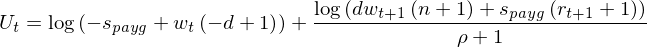

The First Order Condition:


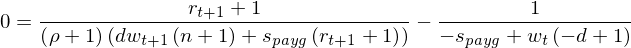

The Savings rate:


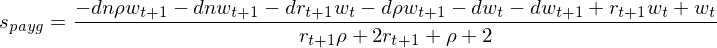

In [17]:
# Solve the household problem and find s
U_payg = sm.log(w_t*(1-d)-s_payg)+(1/(1+rho))*sm.log((1+r_plus)*s_payg+w_plus*d*(1+n))
print(f'The life-time utility')
display(sm.Eq(U,U_payg))
U_d_payg = sm.diff(U_payg,s_payg)
print(f'The First Order Condition:')
display(sm.Eq(0,U_d_payg))
usolve_payg = sm.solve((r_plus + 1)/((rho + 1)*(d*w_plus*(n + 1) + s_payg*(r_plus + 1))) - 1/(-s_payg + w_t*(-d + 1)),s_payg)[0]
print(f'The Savings rate:')
display(sm.Eq(s_payg,usolve_payg))

## Finding staedy state

### The transition curve

Now we set up the transition curve, and we have done some algebraic reduction of the savings function, and we insert the marginal products from the firm problem from the General OLG model.
\begin{eqnarray*}
\frac{K_{t+1}}{L_{t+1}} =k_{t+1}=s_t  \frac{L_t}{L_{t+1}} =s_t  \frac{L_t}{(L_t (1+n) )}=\frac{s_t}{(1+n)}=\frac{1}{(1+n)(2+\rho)}(w_t(1-d)-w_{t+1}d \frac{(1+\rho)(1+n)}{1+r_{t+1}}) = \frac{1}{(1+n)(2+\rho)}((1-\alpha)Ak_t^\alpha(1-d)-(1-\alpha)Ak_{t+1}^\alpha d \frac{(1+\rho)(1+n)}{1+\alpha Ak_{t+1}^{\alpha-1}-\delta})
\end{eqnarray*}

### Analytical solution
We have manually isolated the $k's$ in the transition curve function above, do to sympy not being able to do it.
We found the steady state in the PAYG OLG model only defined by parameters, and defined it as a function to show steady state in the analytic solution.

The steady state in the PAYG OLG model is:


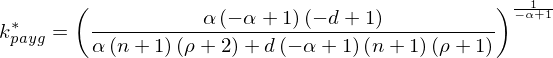

In [18]:
# Defining steady state value of k
def kss_payg2(alpha,n,rho,A,delta,d):
    return ((alpha*(1-alpha)*(1-d))/((1+n)*(2+rho)*alpha+(1+n)*(1-alpha)*d*(1+rho)))**(1/(1-alpha))
print(f'The steady state in the PAYG OLG model is:')
display(sm.Eq(kpaygss,(((alpha*(1-alpha)*(1-d))/((1+n)*(2+rho)*alpha+(1+n)*(1-alpha)*d*(1+rho)))**(1/(1-alpha)))))

In [19]:
# Solves SS for k, given input
kss_payg2(1/3,0.02,0.04,1,1,0.12)

In [20]:
print(f'The steady state value of capital in the PAYG OLG model is :')
display(sm.Eq(kpaygss,0.1259))

The steady state value of capital in the PAYG OLG model is :


### Numerical solution
Now will find the steady state with numerical analysis. First we define the transition curve function as a lambda function. Then we set up the objective function, which is the transition curve function minus $k_{t+1}$. Lastly we optimize with the root_scalar optimizer. 

In [21]:
# Defines global values for parameters
alpha_v = 1/3
n_v = 0.02
rho_v = 0.04
A_v = 1
delta_v = 1
d_v = 0.12

In [22]:
# Solves the numerical solution
transition_payg = lambda k_payg, n, rho, alpha, d, A, delta: ((1/((1+n)*(2+rho)))*((1-alpha)*A*(k_payg**alpha)*(1-d)-(1-alpha)*A*(k_payg**alpha)*d*(((1+rho)*(1+n))/(1+alpha*A*(k_payg**(alpha - 1))-delta))))

obj_transition_payg = lambda x, n, rho, alpha, d, A, delta: x - transition_payg(x, n, rho, alpha, d, A, delta)
result_payg = optimize.root_scalar(obj_transition_payg, args=(n_v, rho_v, alpha_v, d_v, A_v, delta_v), bracket=[0.1,100],method='brentq')
result_payg

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 0.12590629299561928

To make sure that the analytical and numerical solution have found the same result we assert this in the cell below.

In [23]:
print(f'Analytical solution is: {kss_payg2(alpha_v,n_v,rho_v,A_v,delta_v,d_v):.4f}')
print(f'Numerical solution is: {result_payg.root:.4f}')

assert abs(kss_payg2(alpha_v,n_v,rho_v,A_v,delta_v,d_v) - result_payg.root) < 10**(-2)

Analytical solution is: 0.1259
Numerical solution is: 0.1259


## Visualization of the PAYG OLG model

We will again make visualizations of the model. The PAYG model, also has the option to change the share of capital, $\alpha$, the discount factor on consumption when old, $\rho$, and the population growth $n$.

In [24]:
# Defining transistion curve PAYG model
def trans_func_payg(k_t, alpha, A, rho, n, d, delta):
    return (alpha*(1-alpha)*(1-d)*k_t**alpha)/((1+n)*(2+rho)*alpha+(1+n)*(1-alpha)*d*(1+rho))
k_t = np.linspace(0,1,1000)

In [25]:
#Defining the plots
def plot_alpha_payg(alpha):
    print(f"The analytic solution is {kss_payg2(alpha, n_v, rho_v, A_v, delta_v, d_v):.4f}")
    plt.figure(dpi=100)
    plt.xlabel('k_t')
    plt.ylabel('k_t+1')
    plt.title('PAYG OLG model - change in $\\alpha$')
    plt.xlim([0,1]) # fixed x range
    plt.ylim([0,0.5]) # fixed y range
    plt.plot(range(10),range(10), color = 'black')
    plt.plot(k_t,trans_func_payg(k_t, alpha, A_v, rho_v, n_v, d_v, delta_v))
    plt.plot(kss_payg2(alpha, n_v, rho_v, A_v, delta_v, d_v), kss_payg2(alpha, n_v, rho_v, A_v, delta_v, d_v), marker='o')
    plt.legend(('45\N{DEGREE SIGN}-line', 'PAYG OLG', 'Steady state'), loc='upper right')
    plt.grid()
    return plt

def plot_rho_payg(rho):
    print(f"The analytic solution is {kss_payg2(alpha_v, n_v, rho, A_v, delta_v, d_v):.4f}")
    plt.figure(dpi=100)
    plt.xlabel('k_t')
    plt.ylabel('k_t+1')
    plt.title('PAYG OLG model - change in $\\rho$')
    plt.xlim([0,1]) # fixed x range
    plt.ylim([0,0.5]) # fixed y range
    plt.plot(range(10),range(10), color = 'black')
    plt.plot(k_t,trans_func_payg(k_t, alpha_v, A_v, rho, n_v, d_v, delta_v))
    plt.plot(kss_payg2(alpha_v, n_v, rho, A_v, delta_v, d_v),kss_payg2(alpha_v, n_v, rho, A_v, delta_v, d_v), marker='o')
    plt.legend(('45\N{DEGREE SIGN}-line', 'PAYG OLG', 'Steady state'), loc='upper right')
    plt.grid()
    return plt


def plot_n_payg(n):
    print(f"The analytic solution is {kss_payg2(alpha_v, n, rho_v, A_v, delta_v, d_v):.4f}")
    plt.figure(dpi=100)
    plt.xlabel('k_t')
    plt.ylabel('k_t+1')
    plt.title('PAYG OLG model - change in $n$')
    plt.xlim([0,1]) # fixed x range
    plt.ylim([0,0.5]) # fixed y range
    plt.plot(range(10),range(10), color = 'black')
    plt.plot(k_t,trans_func_payg(k_t, alpha_v, A_v, rho_v, n, d_v, delta_v))
    plt.plot(kss_payg2(alpha_v, n, rho_v, A_v, delta_v, d_v),kss_payg2(alpha_v, n, rho_v, A_v, delta_v, d_v), marker='o')
    plt.legend(('45\N{DEGREE SIGN}-line', 'PAYG OLG', 'Steady state'), loc='upper right')
    plt.grid()
    return plt

In [26]:
widgets.interact(
        plot_alpha_payg, 
        alpha = widgets.FloatSlider(
            description="$\\alpha$",
            min=0.01,
            max=0.99,
            step=0.01,
            value=alpha_v,
            continuous_update=False,
        ), 
    )

widgets.interact(
        plot_rho_payg, 
        rho = widgets.FloatSlider(
            description="$\\rho$",
            min=-.99,
            max=1,
            step=0.1,
            value=rho_v,
            continuous_update=False,
        ), 
    )

widgets.interact(
        plot_n_payg, 
        n = widgets.FloatSlider(
            description="n",
            min=-.10,
            max=0.1,
            step=0.01,
            value=n_v,
            continuous_update=False,
        ), 
    )

interactive(children=(FloatSlider(value=0.3333333333333333, continuous_update=False, description='$\\alpha$', …

interactive(children=(FloatSlider(value=0.04, continuous_update=False, description='$\\rho$', max=1.0, min=-0.…

interactive(children=(FloatSlider(value=0.02, continuous_update=False, description='n', max=0.1, min=-0.1, ste…

<function __main__.plot_n_payg(n)>

The PAYG OLG model has the exact same properties on the parameters as in the General OLG model. The changes are just smaller, as the level of capital per capita is lower in steady state for the PAYG OLG model.

# Comparing
Before drawing our conclusion we will compare the to OLG models against each other in the figure below, to better get a grasp on their differences.
Using the same code and procedures as above we have contained it all in one plot.

In [27]:
def plot_com(alpha, n, rho):
    print(f"Interactive figure comparing The General OLG Model and The PAYG OLG Model")
    plt.figure(dpi=100)
    plt.xlabel('k_t')
    plt.ylabel('k_t+1')
    plt.title('PAYG model - change in $\\alpha$, $n$ and $\\rho$')
    plt.xlim([0,1]) # fixed x range
    plt.ylim([0,1]) # fixed y range
    plt.plot(range(10),range(10), color = 'black')
    plt.plot(k_t,trans_func(k_t, alpha, A_v, rho, n))
    plt.plot(k_t,trans_func_payg(k_t, alpha, A_v, rho, n, d_v, delta_v))
    plt.plot(ss_func(alpha, n,rho ,A_v), ss_func(alpha, n,rho ,A_v), marker='x')
    plt.plot(kss_payg2(alpha, n, rho, A_v, delta_v, d_v), kss_payg2(alpha, n, rho, A_v, delta_v, d_v), marker='o')
    plt.legend(('45\N{DEGREE SIGN}-line','General OLG', 'PAYG OLG', 'Steady state for General OLG', 'Steady state for PAYG OLG'), loc='upper right')
    plt.grid()
    return plt

widgets.interact(
        plot_com, 
        alpha = widgets.FloatSlider(
            description="$\\alpha$",
            min=0.01,
            max=0.99,
            step=0.01,
            value=alpha_v,
            continuous_update=False,
        ),
            n = widgets.FloatSlider(
            description="$n$",
            min=-0.2,
            max=2,
            step=0.01,
            value=n_v,
            continuous_update=False,
        ),
            rho = widgets.FloatSlider(
            description="$\\rho$",
            min=-0.99,
            max=0.99,
            step=0.01,
            value=rho_v,
            continuous_update=False,
        ),
    )

interactive(children=(FloatSlider(value=0.3333333333333333, continuous_update=False, description='$\\alpha$', …

<function __main__.plot_com(alpha, n, rho)>

# Conclusion

For all parameter values the steady state value of capital per capita is always larger in the General OLG model, than in the PAYG OLG model. This follow economic theory, as the way the PAYG OLG model is build, with the tax transfer of income. The young generation pays a part of their income straight to the elder generation, which requires a lower level of capital, as the old generation now needs a lower level of savings.